<a href="https://colab.research.google.com/github/aws3ma/jewelry-classification/blob/main/jewelry_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pathlib
import cv2
import os
classification_folder='/content/drive/MyDrive/classification/'
image_size = (180, 180)


In [3]:
# cleaning images
num_skipped = 0
for folder_name in ("bagues", "boucles","bracelet","collier"):
    folder_path = os.path.join(classification_folder+'/train', folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [4]:
data_dir = pathlib.Path(classification_folder+'train/')
jewelry_images_dict={
    'bagues':list(data_dir.glob('bagues/*')),
    'boucle':list(data_dir.glob('boucles/*')),
    'bracelet':list(data_dir.glob('bracelet/*')),
    'collier':list(data_dir.glob('collier/*'))
}
jewelry_labels_dict={
    'bagues':0,
    'boucle':1,
    'bracelet':2,
    'collier':3
}
x,y=[],[]
for jewelry_name, images in jewelry_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,image_size)
    x.append(resized_img)
    y.append(jewelry_labels_dict[jewelry_name])

In [5]:
from google.colab.patches import cv2_imshow
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [6]:
from keras.preprocessing.image import ImageDataGenerator


In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(classification_folder+'train',
                                                 target_size = image_size,
                                                 
                                                 )

validation_set = validation_datagen.flow_from_directory(classification_folder+'validation',
                                            target_size = image_size,
                                           
                                            )

Found 881 images belonging to 4 classes.
Found 79 images belonging to 4 classes.


In [37]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(classification_folder+'test',
                                            target_size = image_size,
                                            )

Found 199 images belonging to 4 classes.


In [8]:
# data_aug= keras.Sequential([
#                             layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
#                             layers.experimental.preprocessing.RandomRotation(0.3),
#                             layers.experimental.preprocessing.RandomZoom(0.3),
#                             layers.experimental.preprocessing.RandomContrast([0.8,1.2])
                            
# ])

In [29]:
model=keras.Sequential([
                        layers.Conv2D(32, 3, padding="valid", activation='relu',input_shape=(180,180,3)),
                        layers.MaxPooling2D(),
                        layers.Conv2D(64,3,padding="valid",activation='relu'),
                        layers.MaxPooling2D(),
                        # layers.Dropout(0.2),
                        layers.Flatten(),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(4, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
def plot_accuracy_and_loss(history):
  import matplotlib.pyplot as plt
  fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title("Model accuracy")
  ax1.set_ylabel("Accuracy")
  ax1.set_xlabel("Epochs")
  ax1.legend(['train','validation'],loc='lower right')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title("Model loss")
  ax2.set_ylabel("Loss")
  ax2.set_xlabel("Epochs")
  ax2.legend(['train','validation'],loc='upper right')
  fig.show()

In [30]:
history = model.fit(training_set,epochs=20,validation_data=validation_set)
# model.save(classification_folder+"checkpoints/1/")

Epoch 1/20
28/28 [==============================] - 16s 477ms/step - loss: 2.7249 - accuracy: 0.3757 - val_loss: 1.7988 - val_accuracy: 0.2532
Epoch 2/20
28/28 [==============================] - 13s 438ms/step - loss: 0.7261 - accuracy: 0.7491 - val_loss: 1.3722 - val_accuracy: 0.5063
Epoch 3/20
28/28 [==============================] - 13s 461ms/step - loss: 0.5188 - accuracy: 0.8354 - val_loss: 1.4162 - val_accuracy: 0.4937
Epoch 4/20
28/28 [==============================] - 13s 463ms/step - loss: 0.4744 - accuracy: 0.8456 - val_loss: 1.2370 - val_accuracy: 0.5443
Epoch 5/20
28/28 [==============================] - 13s 469ms/step - loss: 0.4432 - accuracy: 0.8490 - val_loss: 1.2443 - val_accuracy: 0.5316
Epoch 6/20
28/28 [==============================] - 14s 513ms/step - loss: 0.3567 - accuracy: 0.8797 - val_loss: 1.3045 - val_accuracy: 0.5316
Epoch 7/20
28/28 [==============================] - 15s 523ms/step - loss: 0.3311 - accuracy: 0.8854 - val_loss: 1.3561 - val_accuracy: 0.5316

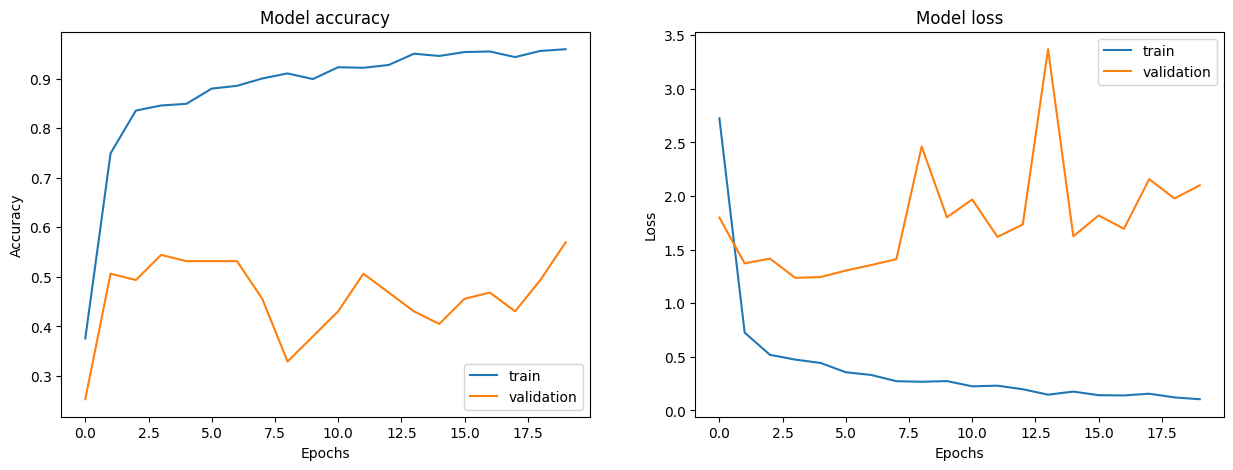

In [31]:
plot_accuracy_and_loss(history)

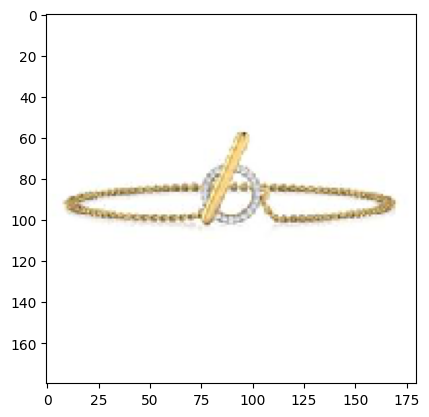

1/1 [==============================] - 0s 22ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


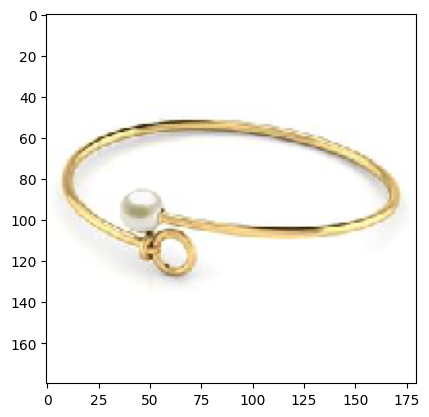

1/1 [==============================] - 0s 20ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


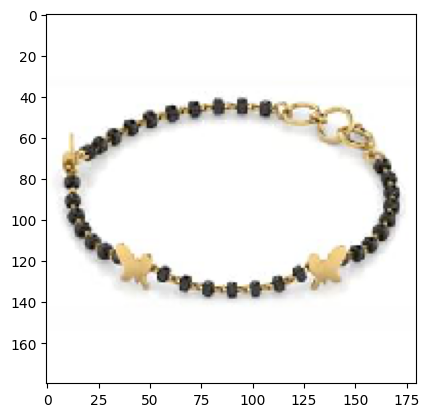

1/1 [==============================] - 0s 20ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


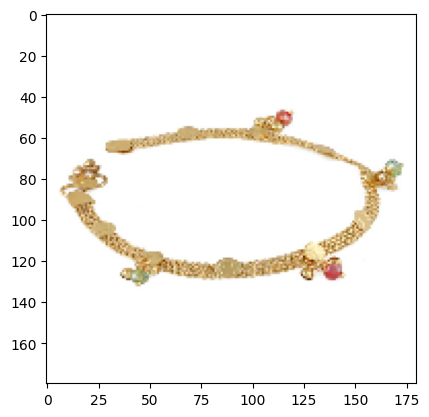

1/1 [==============================] - 0s 27ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


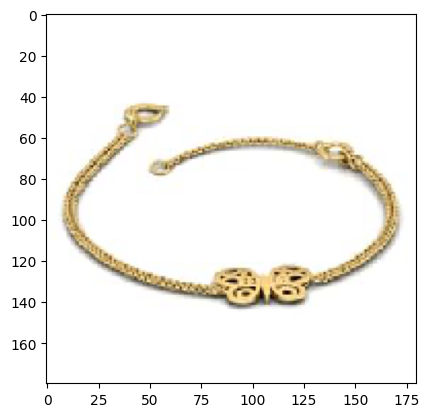

1/1 [==============================] - 0s 21ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


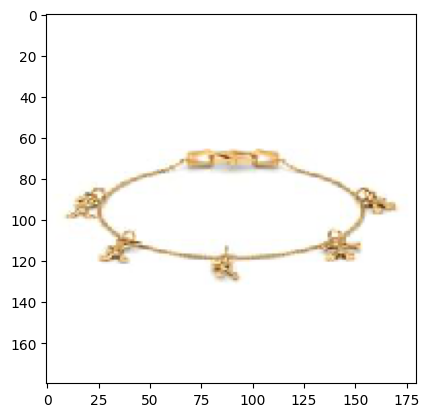

1/1 [==============================] - 0s 21ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


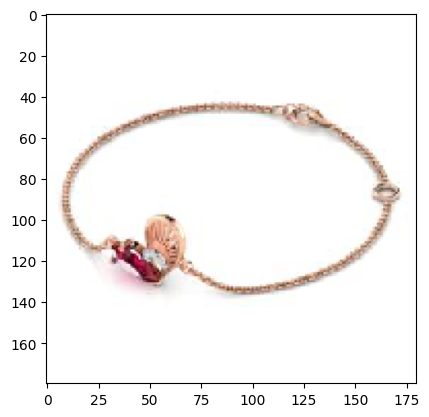

1/1 [==============================] - 0s 32ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


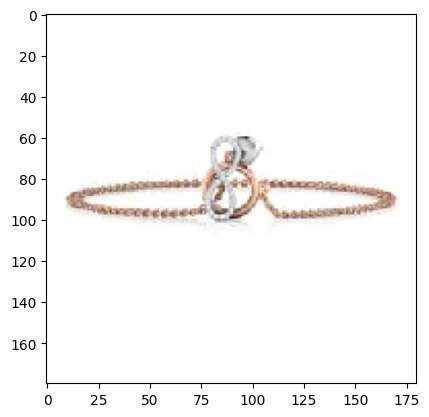

1/1 [==============================] - 0s 31ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


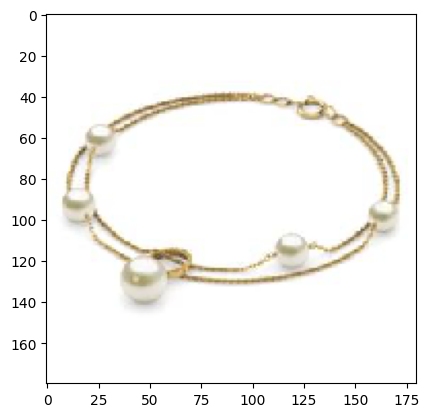

1/1 [==============================] - 0s 36ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


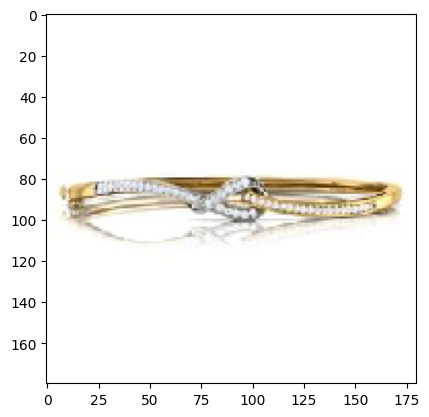

1/1 [==============================] - 0s 37ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


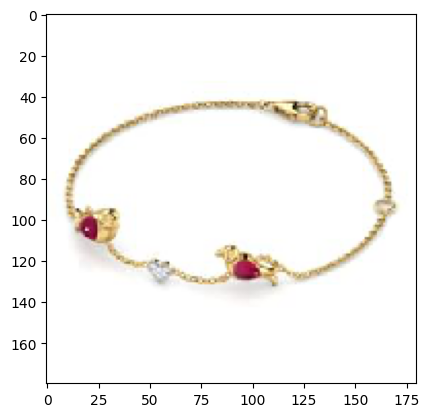

1/1 [==============================] - 0s 34ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


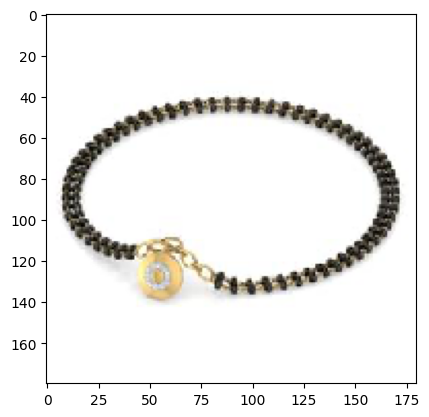

1/1 [==============================] - 0s 34ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


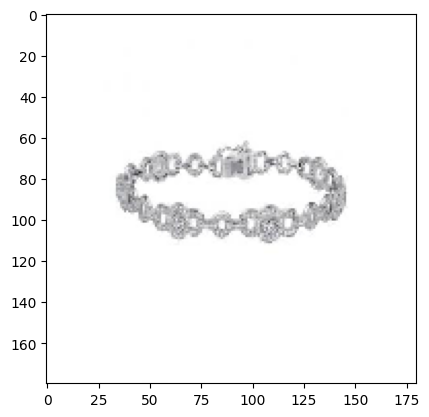

1/1 [==============================] - 0s 38ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


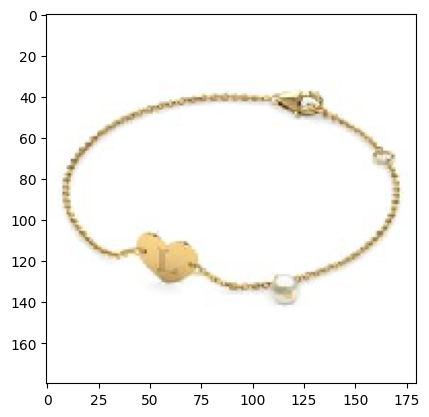

1/1 [==============================] - 0s 37ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


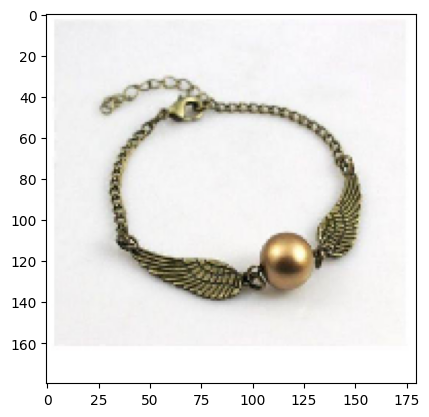

1/1 [==============================] - 0s 35ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


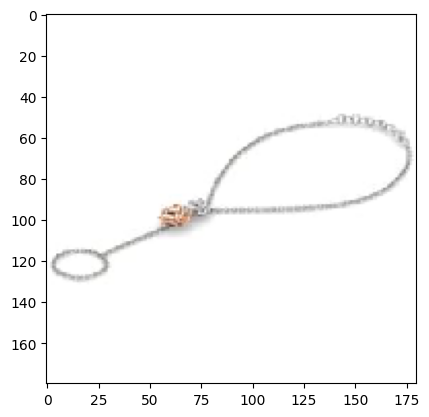

1/1 [==============================] - 0s 22ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


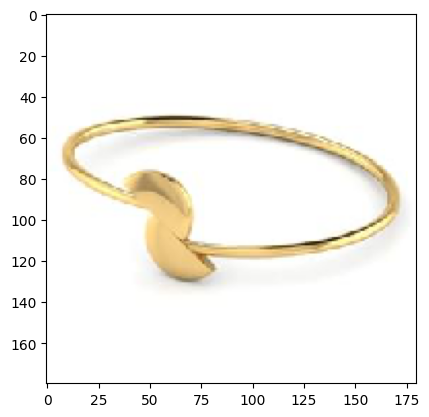

1/1 [==============================] - 0s 22ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


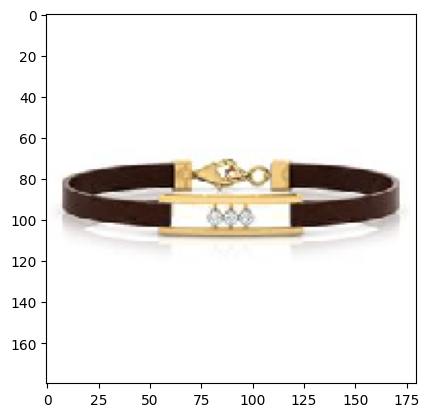

1/1 [==============================] - 0s 21ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


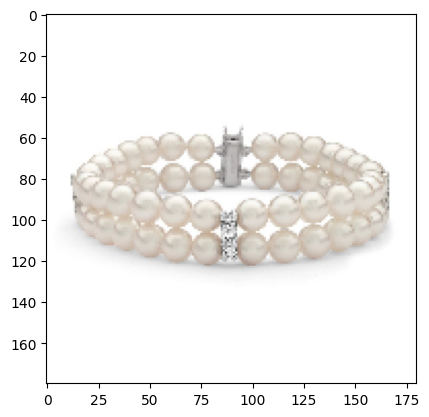

1/1 [==============================] - 0s 24ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


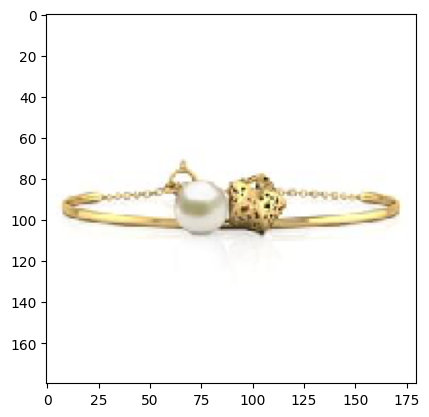

1/1 [==============================] - 0s 20ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


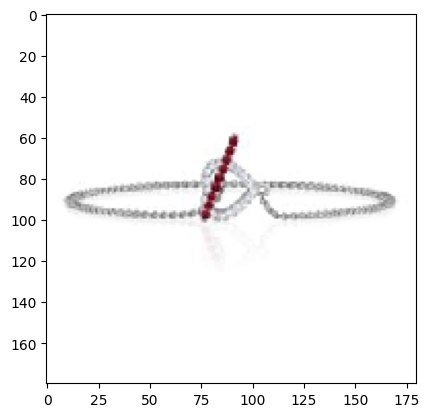

1/1 [==============================] - 0s 31ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


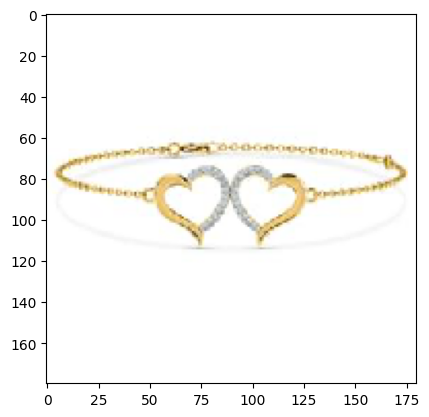

1/1 [==============================] - 0s 33ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


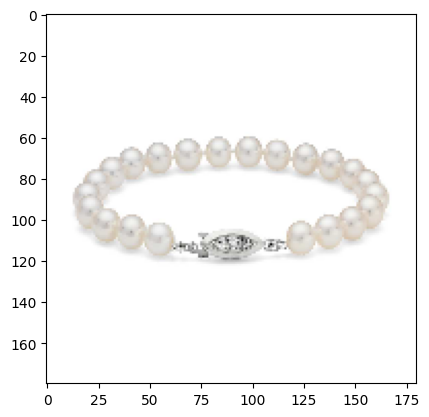

1/1 [==============================] - 0s 36ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


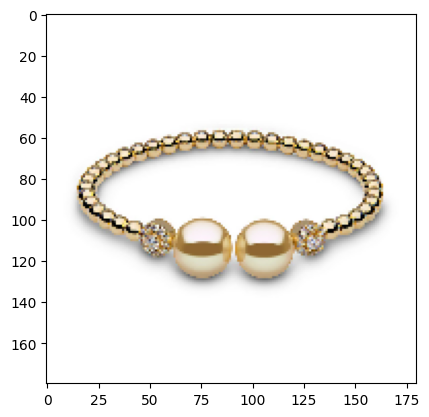

1/1 [==============================] - 0s 35ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


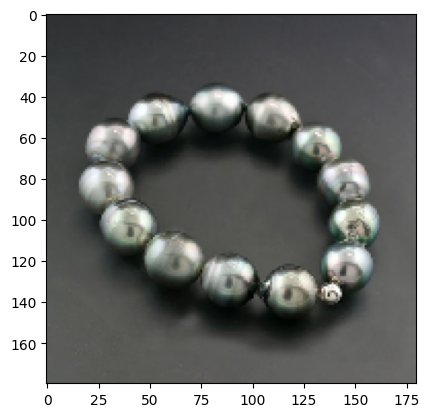

1/1 [==============================] - 0s 30ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


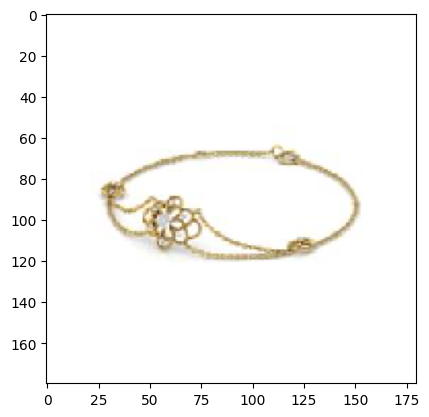

1/1 [==============================] - 0s 48ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


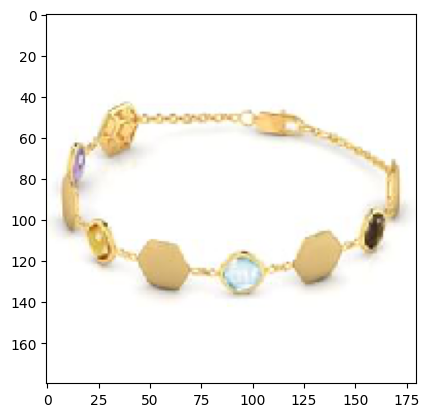

1/1 [==============================] - 0s 31ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


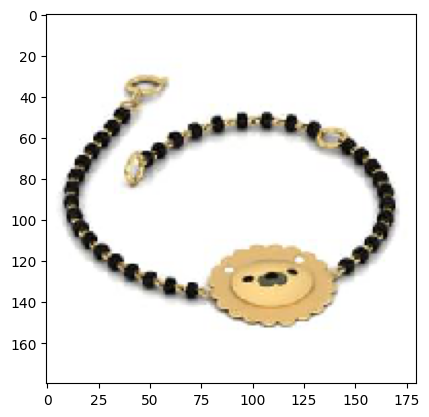

1/1 [==============================] - 0s 33ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


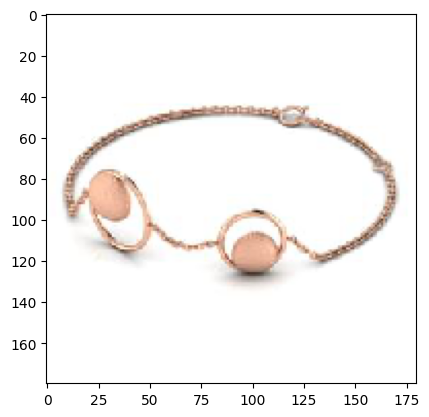

1/1 [==============================] - 0s 27ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


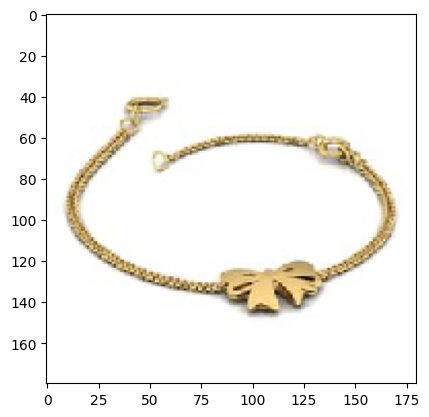

1/1 [==============================] - 0s 34ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


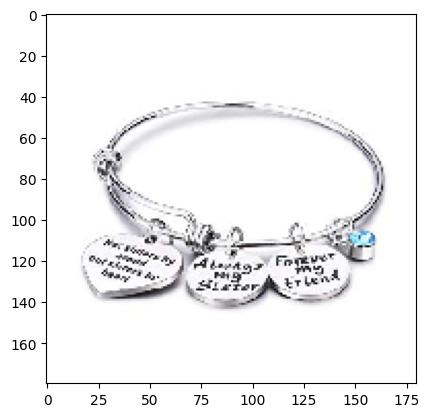

1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


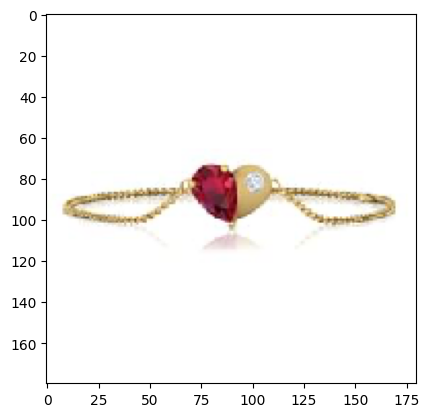

1/1 [==============================] - 0s 24ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


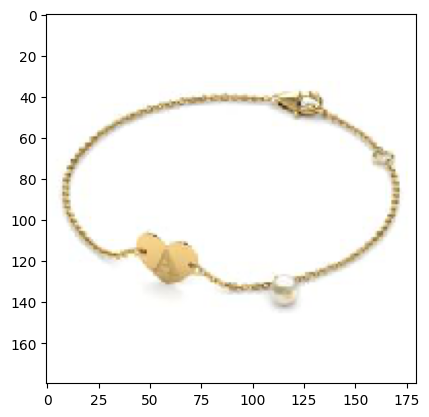

1/1 [==============================] - 0s 21ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


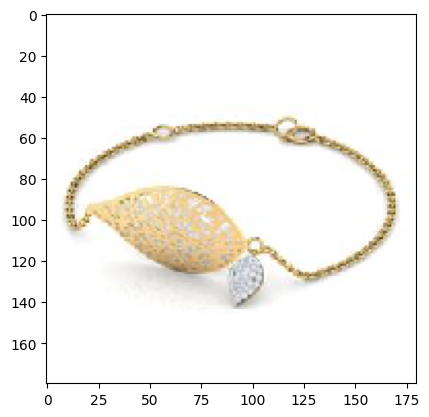

1/1 [==============================] - 0s 29ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


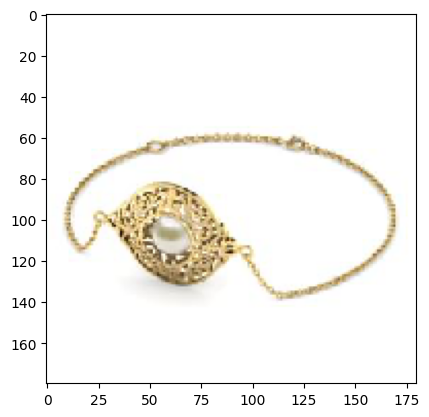

1/1 [==============================] - 0s 22ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


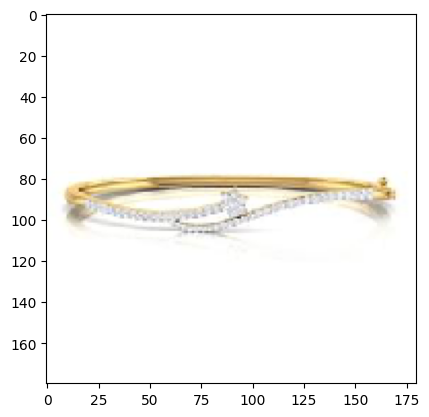

1/1 [==============================] - 0s 23ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


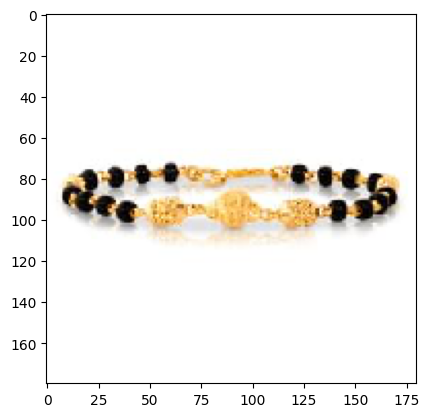

1/1 [==============================] - 0s 31ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


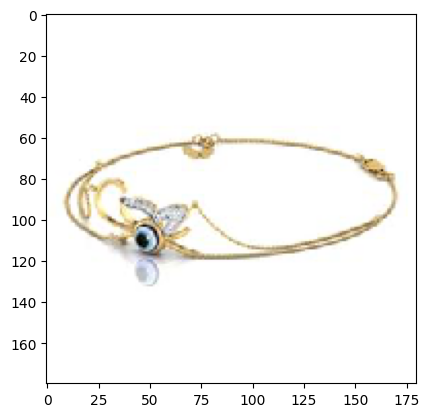

1/1 [==============================] - 0s 25ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


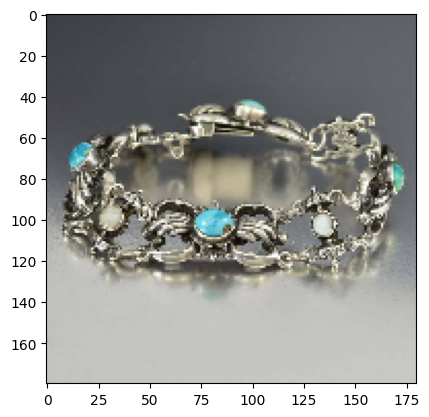

1/1 [==============================] - 0s 27ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


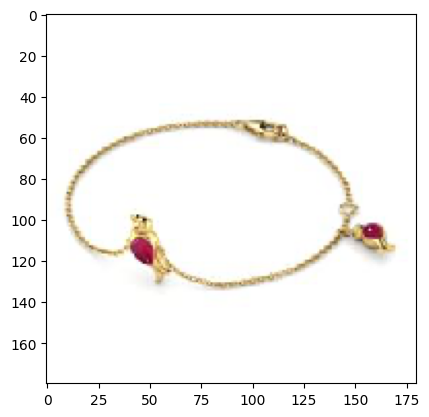

1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


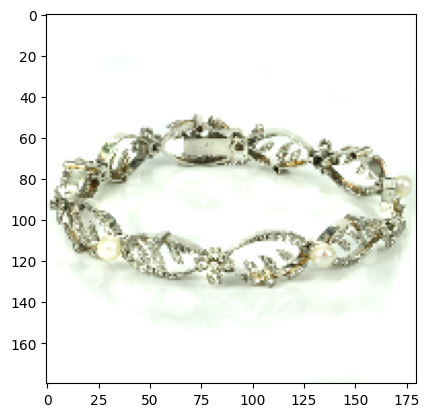

1/1 [==============================] - 0s 37ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


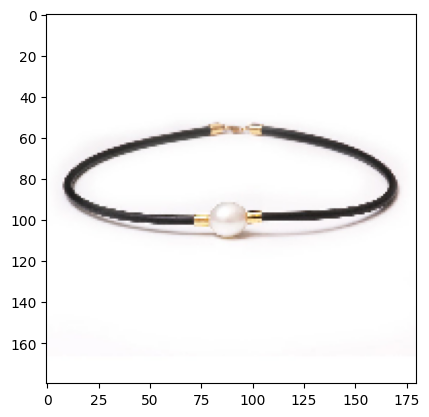

1/1 [==============================] - 0s 47ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


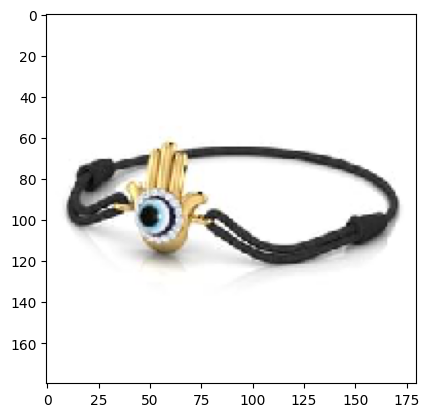

1/1 [==============================] - 0s 32ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


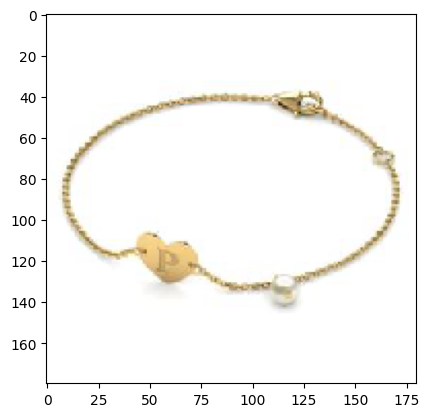

1/1 [==============================] - 0s 32ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


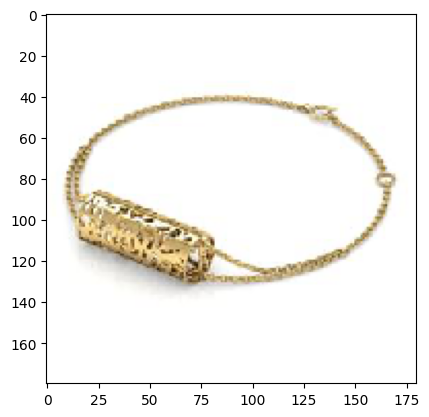

1/1 [==============================] - 0s 35ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


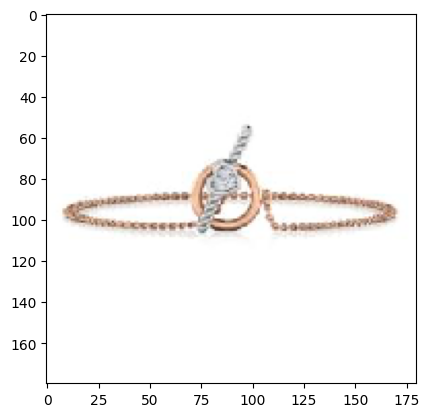

1/1 [==============================] - 0s 44ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


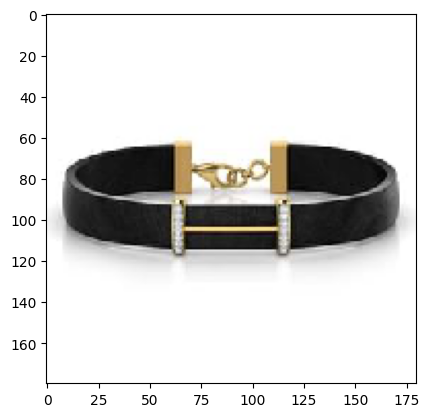

1/1 [==============================] - 0s 35ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


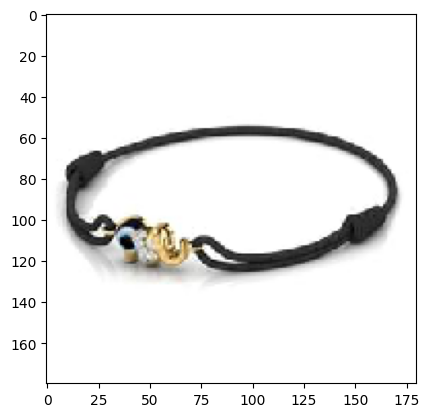

1/1 [==============================] - 0s 37ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet


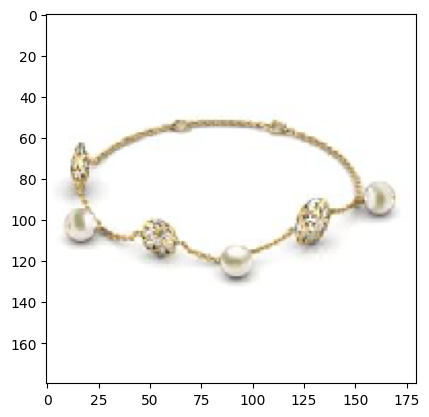

1/1 [==============================] - 0s 36ms/step
[0.0, 0.0, 1.0, 0.0]
bracelet
Bagues : 0
Boucles : 0
Bracelet : 49
Collier : 0


In [35]:
nb_bague=0
nb_boucles=0
nb_bracelet=0
nb_collier=0
test_path=classification_folder+'test/BRACELET/'
for i in os.listdir(test_path):
  img = keras.preprocessing.image.load_img(
      test_path+i, 
      target_size=image_size,
  )
  plt.imshow(img)
  plt.show()
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  l=predictions.tolist()[0]
  print(l)
  if l.index(max(l)) == 0:
    nb_bague+=1
    print("bague")
  if l.index(max(l)) == 1:
    nb_boucles+=1
    print("boucle")
  if l.index(max(l)) == 2:
    nb_bracelet+=1
    print("bracelet")
  if l.index(max(l)) == 3:
    nb_collier+=1
    print("collier")
  # print(f'{100*l[0]}% bagues \n{100*l[1]}% boucles \n{100*l[2]}% bracelet \n{100*l[3]}% collier')
print(f"Bagues : {nb_bague}\nBoucles : {nb_boucles}\nBracelet : {nb_bracelet}\nCollier : {nb_collier}")